In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import math 
import numpy as np

# Part 1: Load data and plot data

Year of First Edit  Edit Counts  Page Views  Number of Words  \
Categories                                                                 
1                        44046         4809     6860566           155931   
2                        56080         3338     3132120           160713   
3                        70100         3542     3208032           113601   
4                        52066         3025     2607705            99623   
5                        68121         4354     7232199           154987   
6                        68153         3538     5671291           120269   

            Number of Images  5000xEditCount           P/E      U-P/E  
Categories                                                             
1                       1286        24045000  19168.065964  20.016491  
2                        723        16690000  21095.198742  22.028923  
3                        369        17710000  42016.750432  43.876514  
4                        645        1512500

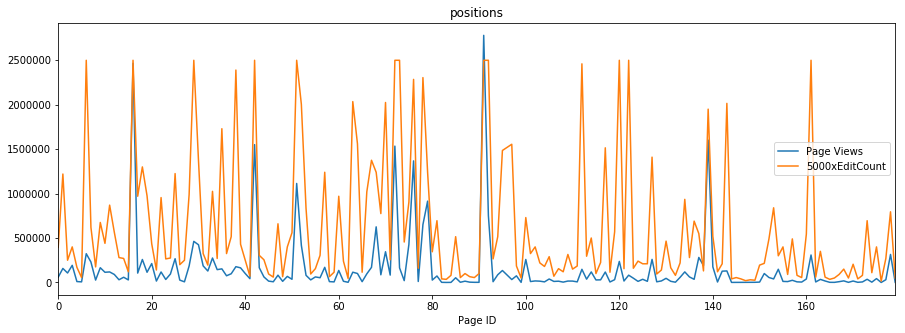

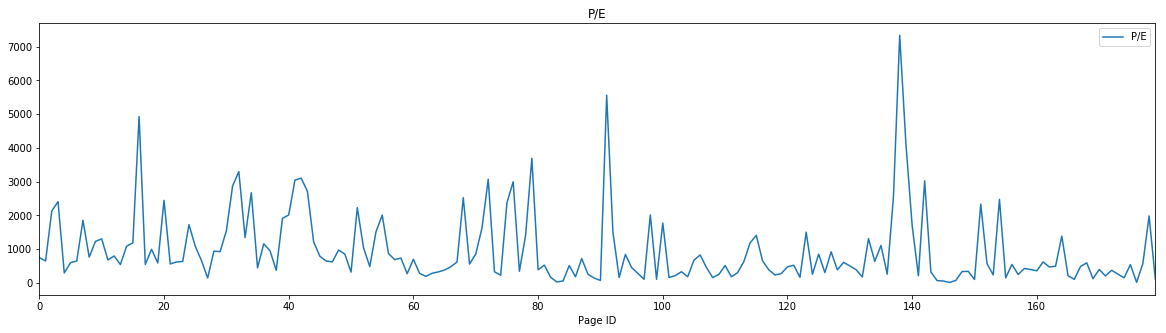

In [30]:
originData = pd.read_csv("Database/Database 2A.csv",index_col=0)
originData = originData.drop(labels=96)
originData['5000xEditCount'] = originData['Edit Counts'].apply(lambda x: int(x) * 5000)
originData.plot.line(y=['Page Views','5000xEditCount'],title='positions', figsize=(15,5))
originData['P/E'] = originData['Page Views'] / originData['Edit Counts']
originData['U-P/E'] = originData['P/E'] / originData['P/E'].mean()
originData.plot.line(y=['P/E'],title='P/E', figsize=(20,5))
print(originData.groupby('Categories').sum())
print(originData.groupby('Categories').mean())

# part 2: Relabel some col's data

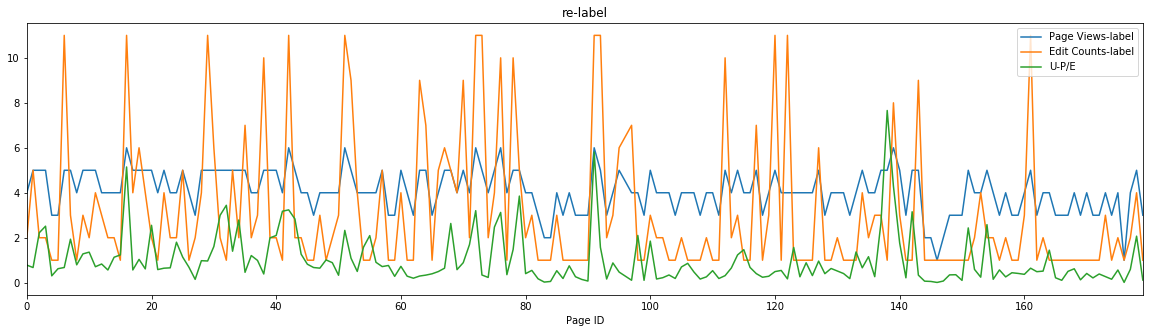

In [31]:
originData['Page Views-label'] = originData['Page Views'].apply(lambda x: int(math.log10(int(x))))
originData['Edit Counts-label'] = originData['Edit Counts'].apply(lambda x: int(int(x) / 50) + 1)
originData.plot.line(y=['Page Views-label', 'Edit Counts-label', 'U-P/E'],title='re-label', figsize=(20,5))
originData.drop(['5000xEditCount'], axis=1, inplace=True)
originData.drop(['P/E'], axis=1, inplace=True)

# Save data to a new csv

In [32]:
originData.to_csv("Database/relabel_2A.csv")